# K - means 2D / 3D
160000개의 원본 데이터를 가지고 k - means 2D / 3D 를 시도하였으나    
3D 기법에서 k 값을 구하는 killing point 에서 장장 50시간이라는 고통을 받고    
다크서클 뿜뿜하고 손절. 존버는 죽는다.   


In [47]:
# Module
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# 2D K-means

In [2]:
# 데이터 불러오기
songs = pd.read_csv('./data/SpotifyAudioFeatures2000_2018.csv')

In [3]:
songs.head()

,Unnamed: 0,Unnamed: 0.1,artist_name,track_name,track_id,popularity,url,images,date,acousticness,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,https://i.scdn.co/image/66ff51342a9b250bf5b998...,2000-10-24,0.01030,...,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
1,1,1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,https://i.scdn.co/image/ea1bb526f0b9d2a3375427...,2000,0.00664,...,0.865,0.000011,11,0.1680,-5.708,0,0.0286,99.010,4,0.543
2,2,2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM...,https://i.scdn.co/image/135ffbfeb47d564df36fdb...,2000-05-23,0.03390,...,0.665,0.000000,5,0.0453,-4.286,0,0.0610,104.504,4,0.760
3,3,3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,https://i.scdn.co/image/48787c279dab6e8c1cc3b4...,2000-10-31,0.14200,...,0.805,0.000000,4,0.0771,-5.946,0,0.2690,94.946,4,0.615
4,4,4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://i.scdn.co/image/495b0549379fc4c324445f...,2000-07-10,0.00239,...,0.661,0.000130,11,0.2340,-7.227,1,0.0281,173.365,4,0.285


In [4]:
songs.tail()

,Unnamed: 0,Unnamed: 0.1,artist_name,track_name,track_id,popularity,url,images,date,acousticness,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
169294,6995,6995,Charles Bradley,I Feel a Change,61lMfe2aGI4EjrlVK03ZoI,54,https://open.spotify.com/track/61lMfe2aGI4Ejrl...,https://i.scdn.co/image/02b02d2a5ca4e7983a98b6...,2018-09-06,0.389,...,0.531,0.000063,5,0.0925,-5.213,0,0.0364,80.489,3,0.319
169295,6996,6996,Espinoza Paz,Se Suponía,1f2R10NpYLGY8TsviTEDzy,55,https://open.spotify.com/track/1f2R10NpYLGY8Ts...,https://i.scdn.co/image/fc53afad90b98ec08a27b2...,2018-12-17,0.795,...,0.278,0.000004,7,0.0848,-7.664,1,0.0676,72.470,4,0.352
169296,6997,6997,Conjunto Rio Grande,Maldita Traición,3QOkh4VtvJqOa6kCk1fyN3,50,https://open.spotify.com/track/3QOkh4VtvJqOa6k...,https://i.scdn.co/image/6f7d01c08c97c850fbf19e...,2018-11-02,0.280,...,0.908,0.000000,0,0.1600,-2.508,1,0.0638,116.605,4,0.822
169297,6998,6998,Cookin Soul,Chicago,3h6mYkJFzfhioau4R8ogDG,52,https://open.spotify.com/track/3h6mYkJFzfhioau...,https://i.scdn.co/image/a0dba4c561663d70a19e84...,2018-08-14,0.202,...,0.448,0.867000,0,0.0693,-7.868,1,0.0413,91.021,4,0.328
169298,6999,6999,Saint Claire,Enough for You,43MP9F7UzvfilSrw2SqZGJ,59,https://open.spotify.com/track/43MP9F7UzvfilSr...,https://i.scdn.co/image/47f7c655ea2efadb8c1ef9...,2018-09-21,0.918,...,0.249,0.000000,9,0.1030,-13.233,1,0.0437,94.039,4,0.346


In [5]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169299 entries, 0 to 169298
Data columns (total 22 columns):
Unnamed: 0          169299 non-null int64
Unnamed: 0.1        169299 non-null int64
artist_name         169299 non-null object
track_name          169299 non-null object
track_id            169299 non-null object
popularity          169299 non-null int64
url                 169299 non-null object
images              169264 non-null object
date                169299 non-null object
acousticness        169299 non-null float64
danceability        169299 non-null float64
duration_ms         169299 non-null int64
energy              169299 non-null float64
instrumentalness    169299 non-null float64
key                 169299 non-null int64
liveness            169299 non-null float64
loudness            169299 non-null float64
mode                169299 non-null int64
speechiness         169299 non-null float64
tempo               169299 non-null float64
time_signature      169299 

In [6]:
songs.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'artist_name', 'track_name', 'track_id',
       'popularity', 'url', 'images', 'date', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'valence'],
      dtype='object')

In [7]:
# int나 float로 구성된 컬럼만 선택하여 데이터프레임 만들기
target_col = ['popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'valence']

In [8]:
songs_data = songs[target_col]

In [32]:
songs_data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,169299.000000,169299.000000,169299.000000,1.692990e+05,169299.000000,169299.000000,169299.000000,169299.000000,169299.000000,169299.000000,169299.000000,169299.000000,169299.000000,169299.000000
mean,40.418750,0.298974,0.562309,2.362045e+05,0.626488,0.124892,5.257645,0.206260,-8.097425,0.668002,0.096151,120.250754,3.892829,0.481786
std,11.893513,0.322394,0.178118,1.100092e+05,0.247669,0.281089,3.558541,0.183229,4.915052,0.470932,0.122897,30.722586,0.442913,0.258444
min,16.000000,0.000000,0.000000,7.229000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.019400,0.447000,1.899470e+05,0.465000,0.000000,2.000000,0.097000,-9.564000,0.000000,0.035000,95.751500,4.000000,0.273000
50%,39.000000,0.157000,0.572000,2.243460e+05,0.664000,0.000019,5.000000,0.129000,-6.796000,1.000000,0.048400,119.455000,4.000000,0.472000
75%,48.000000,0.542000,0.693000,2.649000e+05,0.830000,0.012700,8.000000,0.261000,-5.015000,1.000000,0.096500,140.035000,4.000000,0.687000
max,98.000000,0.996000,0.987000,5.403500e+06,1.000000,1.000000,11.000000,1.000000,2.039000,1.000000,0.965000,232.690000,5.000000,1.000000


In [16]:
# 표준화 필요한 컬럼 : popularity, duration_ms, key, loudness, tempo,time_signature

In [19]:
cols = ['popularity', 'duration_ms', 'key', 'loudness', 'tempo','time_signature']

In [23]:
# 위의 6개 컬럼 표준화
data = songs[cols]
standardized_data = MinMaxScaler().fit_transform(data)

/Users/jooyeon/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [25]:
standardized_data

array([[0.81707317, 0.03886091, 0.27272727, 0.86385983, 0.45234432,
        0.8       ],
       [0.75609756, 0.04201123, 1.        , 0.87512694, 0.42550174,
        0.8       ],
       [0.75609756, 0.05132637, 0.45454545, 0.898048  , 0.44911255,
        0.8       ],
       ...,
       [0.41463415, 0.03177046, 0.        , 0.92670739, 0.50111737,
        0.8       ],
       [0.43902439, 0.01820998, 0.        , 0.84031013, 0.39116851,
        0.8       ],
       [0.52439024, 0.03471916, 0.81818182, 0.75383227, 0.40413855,
        0.8       ]])

In [29]:
df = pd.DataFrame(standardized_data)
df.head()

,0,1,2,3,4,5
0,0.817073,0.038861,0.272727,0.863860,0.452344,0.8
1,0.756098,0.042011,1.000000,0.875127,0.425502,0.8
2,0.756098,0.051326,0.454545,0.898048,0.449113,0.8
3,0.743902,0.048789,0.363636,0.871291,0.408036,0.8
4,0.792683,0.048097,1.000000,0.850642,0.745047,0.8


In [39]:
df1 = df.rename(columns={0: 'popularity', 1: 'duration_ms', 2: 'key', 3: 'loudness', 4: 'tempo', 5: 'time_signature'})
df1.head()

,popularity,duration_ms,key,loudness,tempo,time_signature
0,0.817073,0.038861,0.272727,0.863860,0.452344,0.8
1,0.756098,0.042011,1.000000,0.875127,0.425502,0.8
2,0.756098,0.051326,0.454545,0.898048,0.449113,0.8
3,0.743902,0.048789,0.363636,0.871291,0.408036,0.8
4,0.792683,0.048097,1.000000,0.850642,0.745047,0.8


In [33]:
cols_2 = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'mode', 'speechiness',
          'valence']
df2 = songs[cols_2]
df2.head()

,acousticness,danceability,energy,instrumentalness,liveness,mode,speechiness,valence
0,0.01030,0.542,0.853,0.000000,0.1080,0,0.0498,0.370
1,0.00664,0.545,0.865,0.000011,0.1680,0,0.0286,0.543
2,0.03390,0.950,0.665,0.000000,0.0453,0,0.0610,0.760
3,0.14200,0.843,0.805,0.000000,0.0771,0,0.2690,0.615
4,0.00239,0.429,0.661,0.000130,0.2340,1,0.0281,0.285


In [40]:
# int, float 컬럼 중 표준화 안 해도 되는 컬럼과 표준화한 컬럼 합치기
songs_1 = pd.concat([df1, df2], axis=1)
songs_1.head()

,popularity,duration_ms,key,loudness,tempo,time_signature,acousticness,danceability,energy,instrumentalness,liveness,mode,speechiness,valence
0,0.817073,0.038861,0.272727,0.863860,0.452344,0.8,0.01030,0.542,0.853,0.000000,0.1080,0,0.0498,0.370
1,0.756098,0.042011,1.000000,0.875127,0.425502,0.8,0.00664,0.545,0.865,0.000011,0.1680,0,0.0286,0.543
2,0.756098,0.051326,0.454545,0.898048,0.449113,0.8,0.03390,0.950,0.665,0.000000,0.0453,0,0.0610,0.760
3,0.743902,0.048789,0.363636,0.871291,0.408036,0.8,0.14200,0.843,0.805,0.000000,0.0771,0,0.2690,0.615
4,0.792683,0.048097,1.000000,0.850642,0.745047,0.8,0.00239,0.429,0.661,0.000130,0.2340,1,0.0281,0.285


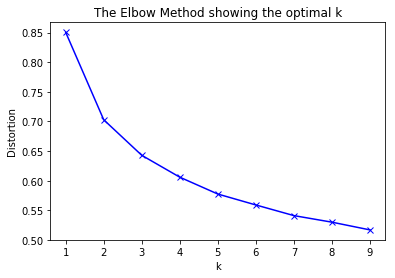

In [41]:
# 최적의 클러스터 갯수 찾기: Elbow Method
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(songs_1)
    kmeanModel.fit(songs_1)
    distortions.append(sum(np.min(cdist(songs_1, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / songs_1.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [42]:
# 최적의 클러스터 갯수 찾기: Silhouette Coefficient(계수가 가장 높은 것이 최적 클러스터 갯수)
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(songs_1)
    label = kmeans.labels_
    sil_coeff = silhouette_score(songs_1, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.3131681990491184
For n_clusters=3, The Silhouette Coefficient is 0.29474206741831904
For n_clusters=4, The Silhouette Coefficient is 0.21867140677583366
For n_clusters=5, The Silhouette Coefficient is 0.22810058882131887
For n_clusters=6, The Silhouette Coefficient is 0.23064302520291813
For n_clusters=7, The Silhouette Coefficient is 0.20058071578077982
For n_clusters=8, The Silhouette Coefficient is 0.20453099982470535
For n_clusters=9, The Silhouette Coefficient is 0.18668395739627844
For n_clusters=10, The Silhouette Coefficient is 0.19934934551565198


In [43]:
# Fit the model.
model = KMeans(n_clusters=5).fit(songs_1)

In [44]:
# Get results.
songs_1['cluster'] = model.predict(songs_1)

In [45]:
songs_1['cluster'].unique()

array([0, 2, 3, 1, 4])

Text(0.5, 1.0, '2D K-means Result')

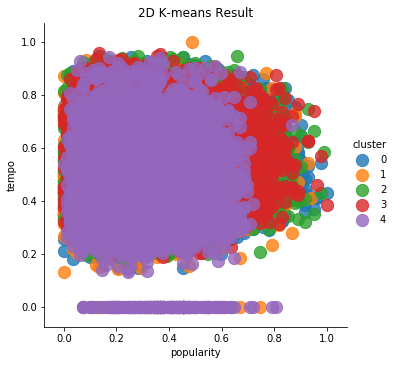

In [48]:
# fit_reg = False는 회귀 옵션 제거, scatter_kws = {"s":50}는 산점도 그래프 점 크기 설정
sb.lmplot('popularity','tempo', data = songs_1, fit_reg = False, scatter_kws = {"s":150}, hue = "cluster")
plt.title('2D K-means Result')

# 3D K-means

In [49]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cmath as math
import sys

In [50]:
# loading the dataset
X = songs_1.values # 분류 분석에 넣을 11개의 연속변수 컬럼
y_set = songs.iloc[:,[3]].values 

## Killing point

In [51]:
def buildWCSSValues(X):
    print("Building WCSS Data...")
    wcss_values = []
    tmax_clusters = int(math.sqrt(len(X)).real)
    stepstr = ''
    sys.stdout.write("Progression : ")
    for i in range(1, tmax_clusters):
        sys.stdout.write('\b'*len(stepstr))
        stepstr = str(i) + "/" + str(tmax_clusters - 1)
        sys.stdout.write(stepstr)
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init = 10, random_state=0)
        kmeans.fit(X)
        wcss_values.append(kmeans.inertia_)
    return wcss_values

In [52]:
wcss_values = buildWCSSValues(X)

Building WCSS Data...
Progression : 1/412/413/414/415/416/417/418/419/4110/411/412/413/414/415/416/417/418/419/420/421/422/423/424/425/426/427/428/429/430/431/432/433/434/435/436/437/438/439/440/441/442/443/444/445/446/447/448/449/450/451/452/453/454/455/456/457/458/459/460/461/462/463/464/465/466/467/468/469/470/471/472/473/474/475/476/477/478/479/480/481/482/483/484/485/486/487/488/489/490/491/492/493/494/495/496/497/498/499/4100/41101/41102/41103/41104/41105/41106/41107/41108/41109/41110/41111/41112/41113/41114/41115/41116/41117/41118/41119/41120/41121/41122/41123/41124/41125/41126/41127/41128/41129/41130/41131/41132/41133/41134/41135/41136/41137/41138/41139/41140/41141/41142/41143/41144/41145/41146/41147/41148/41149/41150/41151/41152/41153/41154/41155/41156/41157/41158/41159/41160/41161/41162/41163/41164/41165/41166/41167/41168/41169/41170/41171/41172/41173/41174/41175/41176/41177/41178/41179/41180/41181/41182/41183/41184/41185/41186/41187/41188/41189/41190/41191/41192/41193/41194/

KeyboardInterrupt: 

In [ ]:
def getElbowPointIndex(wcss):
    curve = wcss
    nPoints = len(curve)
    allCoord = np.vstack((range(nPoints), curve)).T
    np.array([range(nPoints), curve])
    firstPoint = allCoord[0]
    lineVec = allCoord[-1] - allCoord[0]
    lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))
    vecFromFirst = allCoord - firstPoint
    scalarProduct = np.sum(vecFromFirst * np.matlib.repmat(lineVecNorm, nPoints, 1), axis=1)
    vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
    vecToLine = vecFromFirst - vecFromFirstParallel
    distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))
    idxOfBestPoint = np.argmax(distToLine)
    return idxOfBestPoint

In [ ]:
elbowIndex = getElbowPointIndex(wcss_values)

In [ ]:
def showWCSSElbowGraph(wcss_values, elbowIndex):
    max_wcss = max(wcss_values)
    max_clusters = len(wcss_values)
    nb_clusters = np.arange(1, max_clusters+1, 1)
    wcss_r = np.array(wcss_values)/max_wcss
    nb_clusters_r = (1 * np.array(nb_clusters))/max_clusters
    plt.plot(nb_clusters_r, wcss_r)
    lx1=nb_clusters_r[0]
    ly1=wcss_r[0]
    lx2=nb_clusters_r[max_clusters - 1]
    ly2=wcss_r[max_clusters - 1]
    plt.plot([lx1, lx2], [ly1, ly2], c='green')
    coef = (ly2 - ly1)/(lx2 - lx1)
    plt.plot([nb_clusters_r[elbowIndex], 1], [wcss_r[elbowIndex], wcss_r[elbowIndex] - coef], c='red')
    plt.title('WCSS value according to the number of clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS value')
    xticks = nb_clusters_r[0::1]
    xticks_lab = nb_clusters[0::1]
    plt.xticks(xticks, xticks_lab)
    ticks = np.arange(0, 1, 0.05)
    yticks = np.round(ticks * max_wcss) / max_wcss
    plt.yticks(yticks, (yticks*max_wcss).astype(int))
    plt.show()

In [ ]:
showWCSSElbowGraph(wcss_values=wcss_values, elbowIndex=elbowIndex)

In [ ]:
elbowIndex

In [ ]:
# kmeans = KMeans(n_clusters = 11, init = 'k-means++', max_iter=1000, n_init = 100, random_state=0)
# y_kmeans = kmeans.fit_predict(X)
# songs_1['cluster2'] = y_kmeans

In [ ]:
# songs_1.to_csv('./Data_kmeans')

In [ ]:
import plotly
import plotly.graph_objs as go
def getTrace(x, y, z, c, label, s=2):
    trace_points = go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(size=s, line=dict(color='rgb(0, 0, 0)', width=0.5), color=c, opacity=1),
    name=label
    )
    return trace_points;

In [ ]:
#visualising the clusters
centroids = getTrace(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s= 8, c = 'yellow', label='Centroids')
t1 = getTrace(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s= 4, c='red', label = '1') #match with red=1 initial class
t2 = getTrace(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s= 4, c='black', label = '2') #match with black=3 initial class
t3 = getTrace(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s= 4, c='blue', label = '3') #match with blue=2 initial class
t4 = getTrace(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s= 4, c='green', label = '4') #match with green=0 initial class
t5 = getTrace(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s= 4, c='cyan', label = '5') #match with black=3 initial class
t6 = getTrace(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], X[y_kmeans == 5, 2], s= 4, c='sky blue', label = '6') #match with red=1 initial class
t7 = getTrace(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], X[y_kmeans == 6, 2], s= 4, c='purple', label = '7') #match with black=3 initial class
t8 = getTrace(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], X[y_kmeans == 7, 2], s= 4, c='orange', label = '8') #match with blue=2 initial class
t9 = getTrace(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], X[y_kmeans == 8, 2], s= 4, c='pink', label = '9') #match with green=0 initial class
t10 = getTrace(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], X[y_kmeans == 9, 2], s= 4, c='navy', label = '10') #match with black=3 initial class
t11 = getTrace(X[y_kmeans == 10, 0], X[y_kmeans == 10, 1], X[y_kmeans == 10, 2], s= 4, c='yellow green', label = '11') #match with black=3 initial class

In [ ]:
def showGraph(title, x_colname, x_range, y_colname, y_range, z_colname, z_range, traces):
    layout = go.Layout(
    title=title,
    scene = dict(
        xaxis=dict(title=x_colname, range = x_range),
        yaxis=dict(title=y_colname, range = y_range),
        zaxis=dict(title=z_colname, range = z_range)
        )
    )
    fig = go.Figure(data=traces, layout=layout)
    plotly.offline.plot(fig)

In [ ]:
x=X[:,0]
y=X[:,1]
z=X[:,2]
showGraph("3D K-means Result",
          "Cortisol", [min(x),max(x)], "Progesterone", [min(y),max(y)], "Testosterone", [min(z)-1,max(z)], 
          [t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,centroids])